# Obtenció d'establiments
- Obtenció de informacio de les ubicacions físiques dels supermercats de Mercadona.

#### Llegim el fitxer `jsonData.js`

In [1]:
import export_from_mercadona_sources

dataJson = export_from_mercadona_sources.dataJson

#### Crear dataframe

In [2]:
import pandas as pd

df = pd.DataFrame(dataJson['tiendasFull'])

df['fecha creacion registro'] = dataJson['fechaCreacion']

df.head()

,id,p,pv,lc,dr,cp,tf,in,fi,fs,pk,lt,lg,fap,fecha creacion registro
0,883185314342,ES,A CORUÑA,A CORUÑA,"AVDA. DE OZA, 132",15006,981303071,#C#####,#C#####,14/04/24-C#21/04/24-C#28/04/24-C#01/05/24-C#05...,S,43.353426,-8.393176,24/11/2011,13-04-2024
1,883185313520,ES,A CORUÑA,A CORUÑA,"C/ RONDA OUTEIRO, 217",15007,981277366,#C#####,#C#####,14/04/24-C#21/04/24-C#28/04/24-C#01/05/24-C#05...,S,43.358273,-8.419615,09/11/2006,13-04-2024
2,883185315232,ES,A CORUÑA,A CORUÑA,"LUGAR DE MONTEPATELO, 63",15008,981303072,1000#C#1000#1000#1000#1000#1000,2200#C#2200#2200#2200#2200#2200,14/04/24-C#21/04/24-C#28/04/24-C#01/05/24-C#05...,S,43.343187,-8.430894,09/02/2012,13-04-2024
3,883185314430,ES,A CORUÑA,A CORUÑA,"RÚA JOSÉ PASCUAL LÓPEZ CORTÓN, 10",15008,981172014,#C#####,#C#####,14/04/24-C#21/04/24-C#28/04/24-C#01/05/24-C#05...,S,43.336367,-8.410341,20/10/2009,13-04-2024
4,883185315002,ES,A CORUÑA,A CORUÑA,"RÚA PANADEIRAS, 28",15001,981213681,#C#####,#C#####,14/04/24-C#21/04/24-C#28/04/24-C#01/05/24-C#05...,S,43.372883,-8.398581,13/05/2010,13-04-2024


#### Renombrar columnes

In [3]:
df = df.rename(columns={
    'p': 'pais',
    'pv': 'provincia',
    'lc': 'localidad',
    'dr': 'direccion',
    'cp': 'codigo_postal',
    'tf': 'telefono',
    'in': 'horas_aperturas',
    'fi': 'horas_cierres',
    'fs': 'proximos_festivos',
    'pk': 'parking disponible',
    'lt': 'latitud',
    'lg': 'longitud',
    'fap': 'fecha_inauguracion',
})

df.head(1)

,id,pais,provincia,localidad,direccion,codigo_postal,telefono,horas_aperturas,horas_cierres,proximos_festivos,parking disponible,latitud,longitud,fecha_inauguracion,fecha creacion registro
0,883185314342,ES,A CORUÑA,A CORUÑA,"AVDA. DE OZA, 132",15006,981303071,#C#####,#C#####,14/04/24-C#21/04/24-C#28/04/24-C#01/05/24-C#05...,S,43.353426,-8.393176,24/11/2011,13-04-2024


#### Tractament de dades

In [4]:
df.proximos_festivos = df.proximos_festivos.apply(lambda x: x.split("#"))

In [5]:
shift_hours = {
    'horas_aperturas': '09:00',
    'horas_cierres': '22:00',
}

def convert_hours(row, column_name):
    week_days = row[column_name].split('#')
    hours = []

    for day in week_days:
        if day == '':
            hours.append(shift_hours[column_name])
        elif day == 'C':
            hours.append('Cerrado')
        else:
            hours.append(f'{day[0:2]}:{day[2:]}')
    return hours

df['horas_aperturas'] = df.apply(lambda row: convert_hours(row, 'horas_aperturas'), axis=1)
df['horas_cierres'] = df.apply(lambda row: convert_hours(row, 'horas_cierres'), axis=1)

df.head()

,id,pais,provincia,localidad,direccion,codigo_postal,telefono,horas_aperturas,horas_cierres,proximos_festivos,parking disponible,latitud,longitud,fecha_inauguracion,fecha creacion registro
0,883185314342,ES,A CORUÑA,A CORUÑA,"AVDA. DE OZA, 132",15006,981303071,"[09:00, Cerrado, 09:00, 09:00, 09:00, 09:00, 0...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.353426,-8.393176,24/11/2011,13-04-2024
1,883185313520,ES,A CORUÑA,A CORUÑA,"C/ RONDA OUTEIRO, 217",15007,981277366,"[09:00, Cerrado, 09:00, 09:00, 09:00, 09:00, 0...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.358273,-8.419615,09/11/2006,13-04-2024
2,883185315232,ES,A CORUÑA,A CORUÑA,"LUGAR DE MONTEPATELO, 63",15008,981303072,"[10:00, Cerrado, 10:00, 10:00, 10:00, 10:00, 1...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.343187,-8.430894,09/02/2012,13-04-2024
3,883185314430,ES,A CORUÑA,A CORUÑA,"RÚA JOSÉ PASCUAL LÓPEZ CORTÓN, 10",15008,981172014,"[09:00, Cerrado, 09:00, 09:00, 09:00, 09:00, 0...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.336367,-8.410341,20/10/2009,13-04-2024
4,883185315002,ES,A CORUÑA,A CORUÑA,"RÚA PANADEIRAS, 28",15001,981213681,"[09:00, Cerrado, 09:00, 09:00, 09:00, 09:00, 0...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.372883,-8.398581,13/05/2010,13-04-2024


#### Exportem el dataframe

In [6]:
df.to_csv('./establishments.csv', index=False)

#### Exploració de dades

In [7]:
import matplotlib.pyplot as plt

#### Representació geogràfica

In [8]:
def mostrar_mapa(long, lat):
    longitudes = long
    latitudes = lat

    plt.figure(figsize=(10, 6))
    plt.scatter(longitudes, latitudes, alpha=0.5, marker='o', color='blue')

    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.title('Mapa de dispersió de Longitud i Latitud')

    plt.grid(True)
    plt.show()

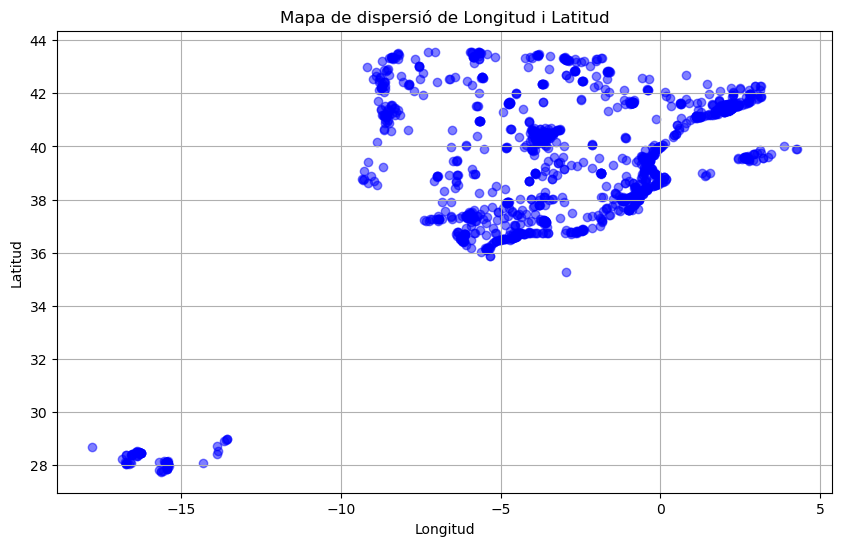

In [9]:
mostrar_mapa(df.longitud, df.latitud)

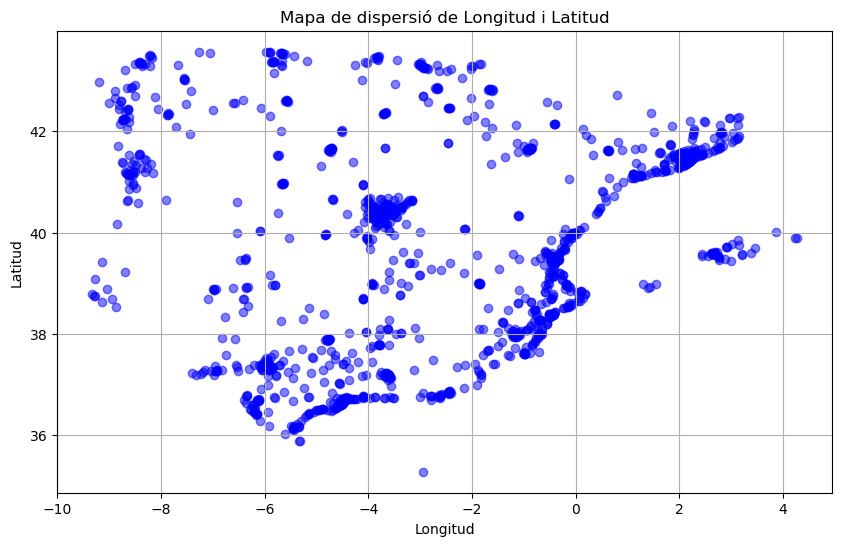

In [10]:
long = df[(df['longitud'] >= -10)]['longitud']
lat = df[(df['latitud'] >= 34)]['latitud']

mostrar_mapa(long, lat)

In [11]:
df['pais'].unique()

array(['ES', 'PT'], dtype=object)

#### Visualització de les inauguracions / supermercats de cada província

In [12]:
df[['dia_inauguracion', 'mes_inauguracion', 'año_inauguracion']] = df.fecha_inauguracion.apply(lambda fecha: pd.Series([int(part) for part in fecha.split('/')]))
df.head(2)

,id,pais,provincia,localidad,direccion,codigo_postal,telefono,horas_aperturas,horas_cierres,proximos_festivos,parking disponible,latitud,longitud,fecha_inauguracion,fecha creacion registro,dia_inauguracion,mes_inauguracion,año_inauguracion
0,883185314342,ES,A CORUÑA,A CORUÑA,"AVDA. DE OZA, 132",15006,981303071,"[09:00, Cerrado, 09:00, 09:00, 09:00, 09:00, 0...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.353426,-8.393176,24/11/2011,13-04-2024,24,11,2011
1,883185313520,ES,A CORUÑA,A CORUÑA,"C/ RONDA OUTEIRO, 217",15007,981277366,"[09:00, Cerrado, 09:00, 09:00, 09:00, 09:00, 0...","[22:00, Cerrado, 22:00, 22:00, 22:00, 22:00, 2...","[14/04/24-C, 21/04/24-C, 28/04/24-C, 01/05/24-...",S,43.358273,-8.419615,09/11/2006,13-04-2024,9,11,2006


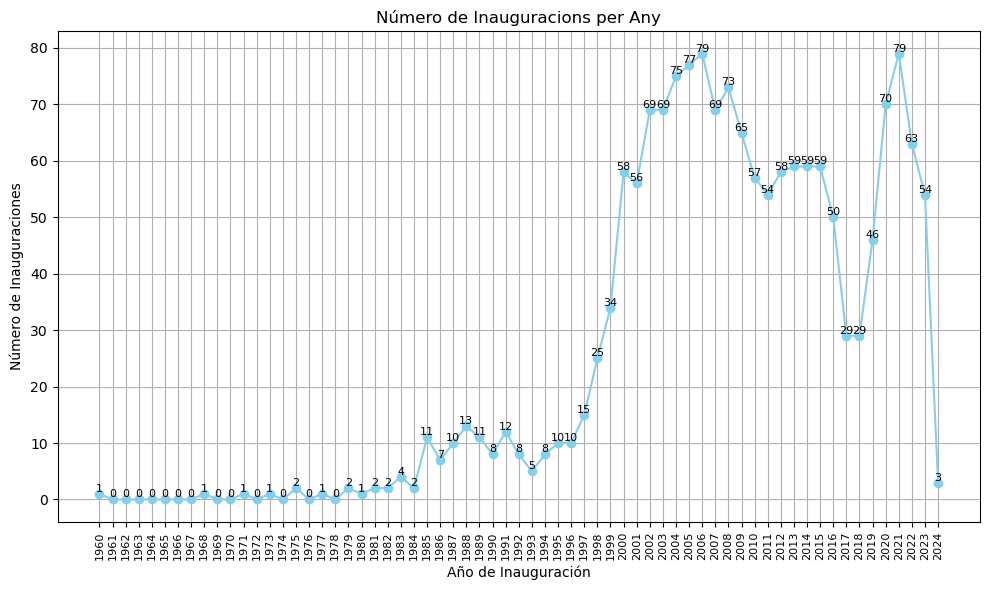

In [13]:
inauguraciones = df['año_inauguracion'].value_counts().sort_index(ascending=True)

# Crear una serie per tots els possibles anys
años_completos = pd.Series(range(inauguraciones.index.min(), inauguraciones.index.max() + 1))

# Anys possibles
anys = años_completos.unique()

# count per cada any
count = inauguraciones.reindex(anys, fill_value=0)

# Crear grafic
plt.figure(figsize=(10, 6))
plt.plot(anys, count, marker='o', color='skyblue', linestyle='-')

# Agregar valor per cada punt
for año, conteo in zip(anys, count):
    plt.text(año, conteo, str(conteo), ha='center', va='bottom', fontsize=8)

plt.xticks(anys, rotation=90, fontsize=8) 
plt.xlabel('Año de Inauguración')
plt.ylabel('Número de Inauguraciones')
plt.title('Número de Inauguracions per Any')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

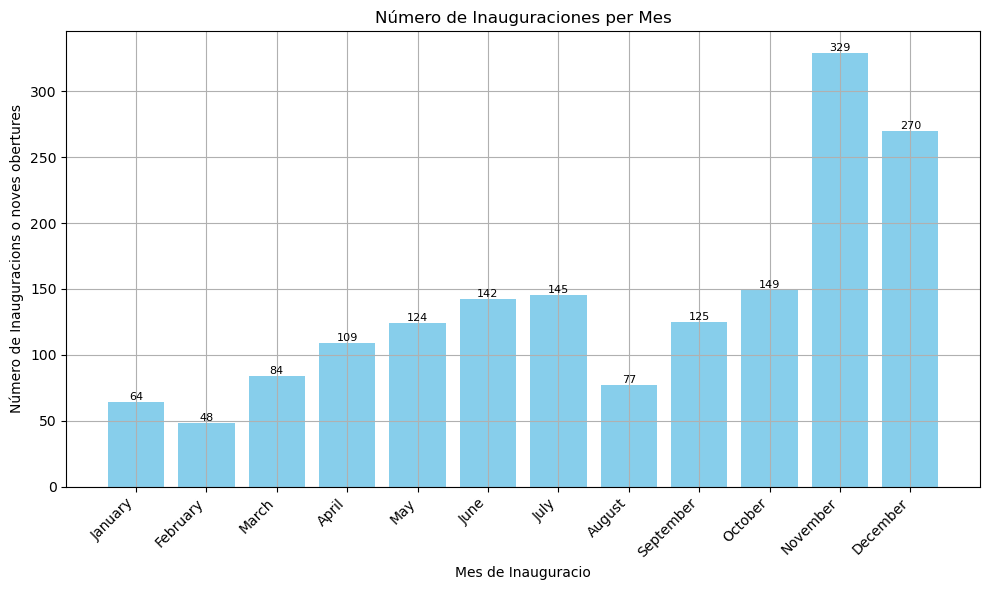

In [14]:
import calendar

inauguraciones = df['mes_inauguracion'].value_counts().sort_index(ascending=True)

# Obtenir total
meses = inauguraciones.index
count = inauguraciones.values

# Noms mesos
nombres_meses = [calendar.month_name[mes] for mes in meses]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(nombres_meses, count, color='skyblue')

# Agregar el valor de cada barra
for nombre_mes, conteo in zip(nombres_meses, count):
    plt.text(nombre_mes, conteo, str(conteo), ha='center', va='bottom', fontsize=8)

# Configurar labels
plt.xlabel('Mes de Inauguracio')
plt.ylabel('Número de Inauguracions o noves obertures')
plt.title('Número de Inauguraciones per Mes')

plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

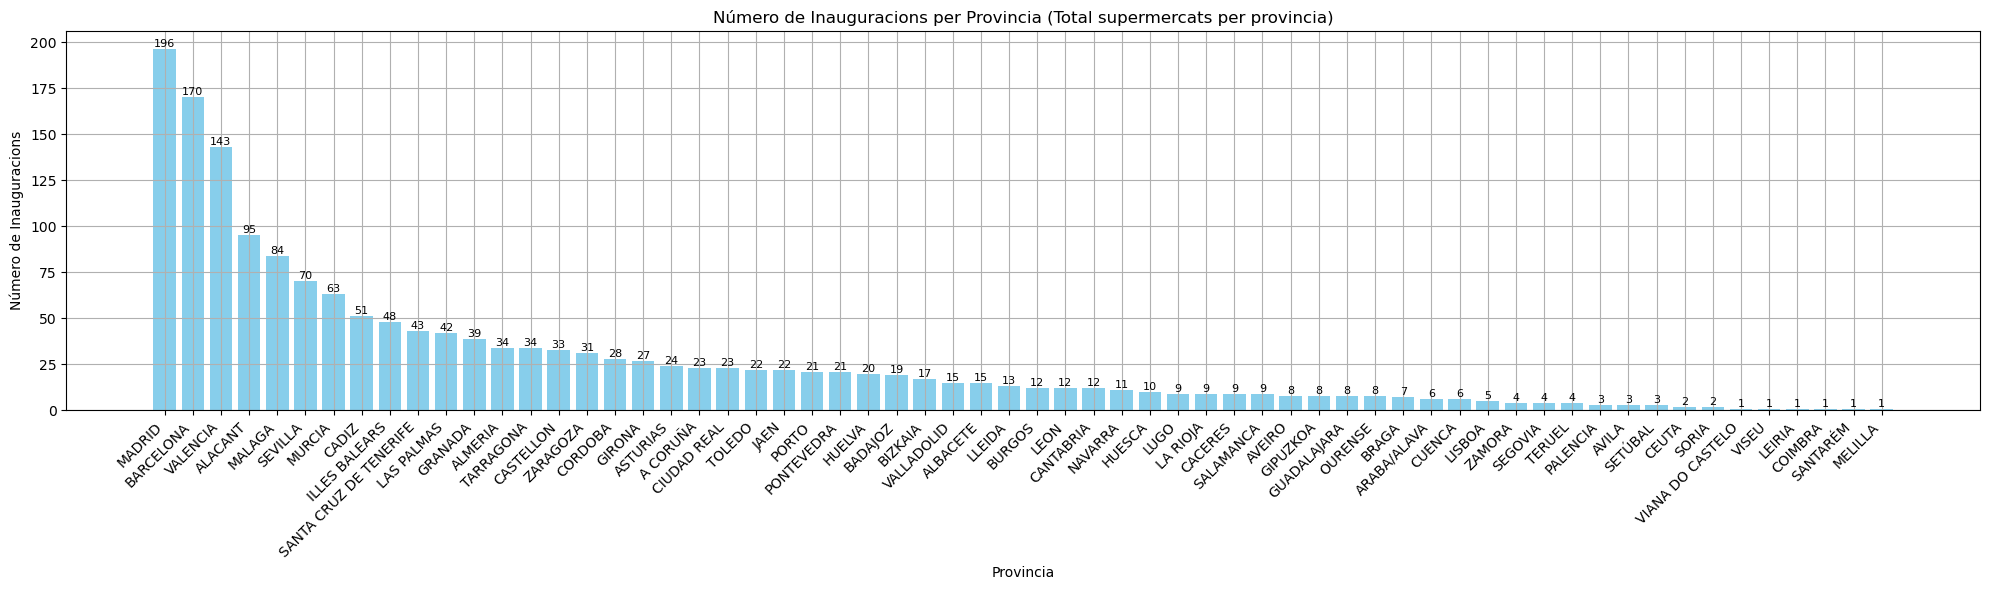

In [15]:
inauguraciones = df['provincia'].value_counts().sort_values(ascending=False)

# Obtenir total
provincias = inauguraciones.index
count = inauguraciones.values

# Crear el histograma
plt.figure(figsize=(20, 6)) 
plt.bar(provincias, count, color='skyblue')

# Agregar el valor de cada barra
for provincia, conteo in zip(provincias, count):
    plt.text(provincia, conteo, str(conteo), ha='center', va='bottom', fontsize=8)

# Configurar labels
plt.xlabel('Provincia')
plt.ylabel('Número de Inauguracions')
plt.title('Número de Inauguracions per Provincia (Total supermercats per provincia)')

plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Representació España vs Portugal

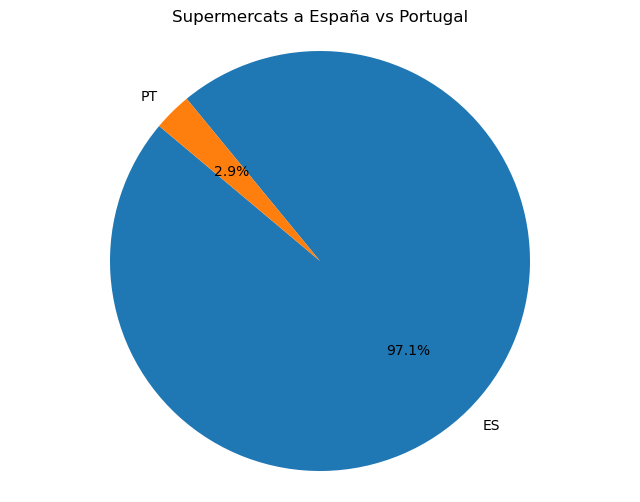

In [16]:
contador = df['pais'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(contador, labels=contador.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Supermercats a España vs Portugal')
plt.show()